### Import thư viện

In [22]:
import numpy as np                  #tính toán ma trận
import matplotlib.pyplot as plt     #hiển thị ảnh
from PIL import Image               #đọc, ghi ảnh

### Hàm xử lý input

In [23]:
def input_from_user():
    filename = input('filename: ')

    while True:
        try:
            k_clusters = int(input('k_clusters: '))
            assert k_clusters>0
        except ValueError:
            print("Not an integer! Please enter an integer.")
        except AssertionError:
            print("Please enter a positive integer.")
        else:
            break

    while True:
        try:
            max_iter = int(input('max_iter: '))
            assert max_iter>0
        except ValueError:
            print("Not an integer! Please enter an integer.")
        except AssertionError:
            print("Please enter a positive integer.")
        else:
            break

    while True:
        try:
            init_type = input('init_type [random/in_pixels]: ')
            assert init_type in ['random', 'in_pixels']
        except AssertionError:
            print("Please enter a supported init type.")
        else:
            break

    while True:
        try:
            format = input('saving file format [png/pdf]: ')
            assert format in ['pdf', 'png']
        except AssertionError:
            print("Please enter a supported format.")
        else:
            break
    return filename, k_clusters, max_iter, init_type, format

In [24]:
def data_from_image(filename):
    img = Image.open(filename)
    img = np.array(img, dtype=np.int32)
    len_img = len(img)
    img = img.reshape(-1, img.shape[-1])
    return img, len_img

### Hàm xử lý thuật toán

In [25]:
def init_k_centroids(img_1d, k_clusters, init_centroids='random'):                                         
    if init_centroids=='random':
        return np.random.choice(256, size=(k_clusters, img_1d.shape[-1]), replace=False)
    else:
        indexes = np.random.choice(len(img_1d), size=k_clusters, replace=False)
        return img_1d[indexes]
    

def labelling(img_1d, k_centroids):
    return np.argmin(np.sum((img_1d[:, np.newaxis, :] - k_centroids[np.newaxis, :, :])**2, axis=-1), axis=1)


def update_k_centroids_and_labels(img_1d, k_centroids):
    labels = labelling(img_1d, k_centroids)
    new_k_centroids = np.zeros_like(k_centroids)

    for _ in range(len(k_centroids)):
        new_k_centroids[_] = img_1d[tuple([(labels==_).nonzero()[0]])].mean(axis=0) if img_1d[tuple([(labels==_).nonzero()[0]])].size!=0 else img_1d[np.random.randint(0, len(img_1d),1)]

    for i in range(len(k_centroids)-1):
        for j in range(i+1, len(k_centroids)):
            if np.array_equal(k_centroids[i], k_centroids[j]):
                labels[labels==j]=i
                k_centroids[j]=img_1d[np.random.randint(0, len(img_1d), 1)]
                
    return new_k_centroids, labels

In [26]:
def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    k_centroids = init_k_centroids(np.unique(img_1d, axis=0), k_clusters, init_centroids)

    for _ in range(max_iter):
        new_k_centroids, labels = update_k_centroids_and_labels(img_1d, k_centroids)
        if np.array_equal(k_centroids, new_k_centroids):
            return k_centroids, labels
        k_centroids = new_k_centroids.copy()
        
    return k_centroids, labels

### Hàm xử lý output

In [27]:
def to_img(centroids, labels, len_img):
    return centroids[labels].reshape(len_img, -1, centroids.shape[-1]).astype(np.uint8)

def save_img(img, filename):
    plt.imsave(f"{filename}", img)

### Chương trình chính (main)

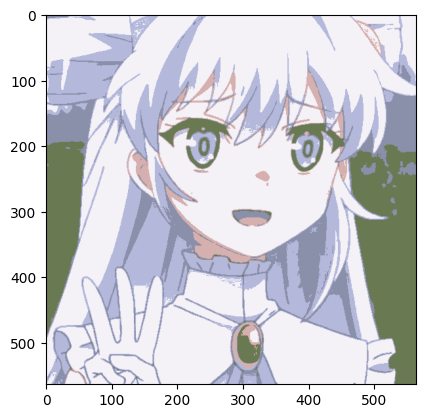

In [28]:
def main():
    filename, k_clusters, max_iter, init_type, format = input_from_user()
    img_1d, len_img = data_from_image(filename)

    centroids, labels = kmeans(img_1d, k_clusters , max_iter, init_type)
    
    img = to_img(centroids, labels, len_img)
    save_img(img, 'compressed_output'+'.'+format)
    plt.imshow(img)

if __name__ == "__main__":
    main()